# IBM Machine Learning - Supervised Machine Learning Regression Report


In [3]:
#https://www.kaggle.com/simranjain17/insurance

# Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import Library


In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
# view data imported
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Data Preprocessing

In [4]:
# backup of previous dataframe
df_processing = df.copy()

In [5]:
df_processing.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
# info of data
df_processing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# =========Dealing missing data=========
df_processing.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
#======Data Formatting (column name)=====
df_processing.rename(columns={'children':'No of children'}, inplace=True)
df_processing.columns


Index(['age', 'sex', 'bmi', 'No of children', 'smoker', 'region', 'expenses'], dtype='object')

In [8]:
#======== Data Normalization ===========
df_processing.drop(['expenses'], axis=1).skew()


age               0.055673
bmi               0.284593
No of children    0.938380
dtype: float64

<AxesSubplot:ylabel='Frequency'>

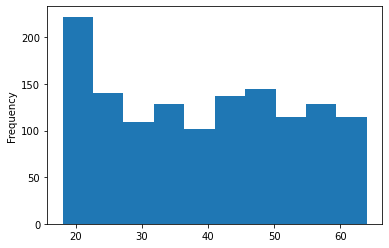

In [9]:
df_processing.age.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

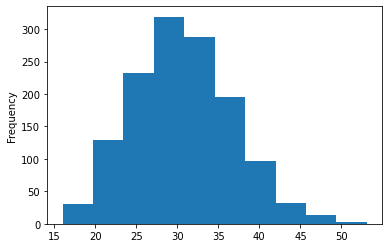

In [10]:
df_processing.bmi.plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

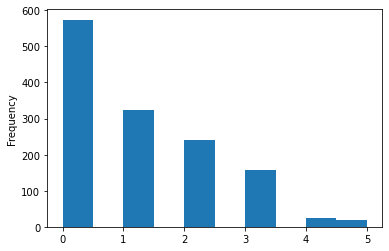

In [11]:
df_processing['No of children'].plot(kind="hist")

In [12]:
# ================Binning===============
bins = np.linspace(min(df_processing['age']), 
                   max(df_processing['age']), 
                   4)

df_processing['age'].value_counts().sort_values(ascending=True)

age_group = ['young adults', 'adults', 'old age']

df_processing['age_groups'] = pd.cut(df_processing['age'], 
                                     bins, 
                                     labels=age_group, 
                                     include_lowest=True)

In [13]:
df_processing.head()

,age,sex,bmi,No of children,smoker,region,expenses,age_groups
0,19,female,27.9,0,yes,southwest,16884.92,young adults
1,18,male,33.8,1,no,southeast,1725.55,young adults
2,28,male,33.0,3,no,southeast,4449.46,young adults
3,33,male,22.7,0,no,northwest,21984.47,young adults
4,32,male,28.9,0,no,northwest,3866.86,young adults


# EDA

In [14]:
df_eda = df_processing.copy()


In [15]:
df_eda.head()

,age,sex,bmi,No of children,smoker,region,expenses,age_groups
0,19,female,27.9,0,yes,southwest,16884.92,young adults
1,18,male,33.8,1,no,southeast,1725.55,young adults
2,28,male,33.0,3,no,southeast,4449.46,young adults
3,33,male,22.7,0,no,northwest,21984.47,young adults
4,32,male,28.9,0,no,northwest,3866.86,young adults


In [16]:
# number of rows and columns
num_rows, num_cols = df.shape
print(f'There are {num_rows} rows and {num_cols} columns.')

There are 1338 rows and 7 columns.


In [17]:
# view columns in data set
df_eda.columns

Index(['age', 'sex', 'bmi', 'No of children', 'smoker', 'region', 'expenses',
       'age_groups'],
      dtype='object')

In [80]:
df_eda.age_groups.value_counts()

young adults    523
old age         413
adults          402
Name: age_groups, dtype: int64

In [81]:
df_eda.age_groups.unique()

['young adults', 'adults', 'old age']
Categories (3, object): ['young adults' < 'adults' < 'old age']

In [18]:
# check column data types
df_eda.dtypes

age                  int64
sex                 object
bmi                float64
No of children       int64
smoker              object
region              object
expenses           float64
age_groups        category
dtype: object

In [19]:
# Descriptive Analysis 
df_eda.describe()

,age,bmi,No of children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [20]:
# Descriptive Analysis (object)
df_eda.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


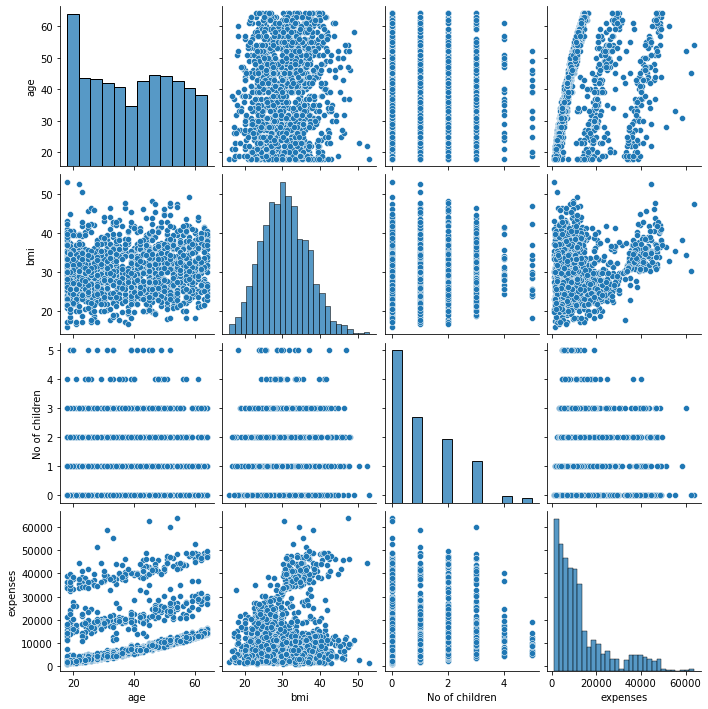

In [21]:
# ============= EDA pairplot ===============
sns.pairplot(data=df_eda)

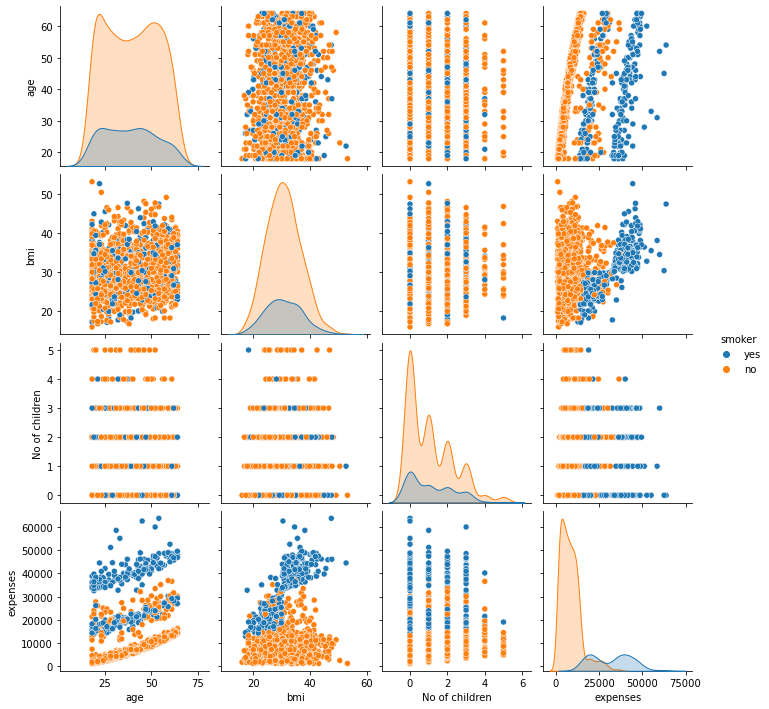

In [22]:
# ============= EDA pairplot smoker and non smoker===============
sns.pairplot(data=df_eda,hue ='smoker')

# EDA numerical data

Text(0.5, 1.0, 'With Smoker')

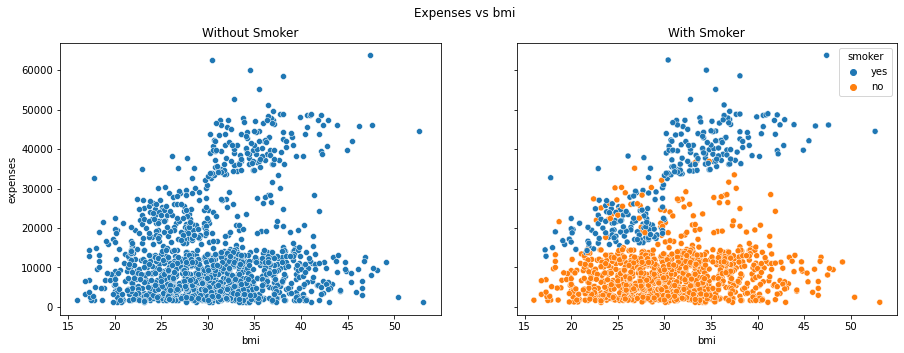

In [23]:
# =========== EDA numerical data ===========
fig, axes = plt.subplots(1,2, figsize=(15, 5), sharey=True)
fig.suptitle('Expenses vs bmi')


sns.scatterplot(ax=axes[0], x='bmi',y='expenses',data=df_eda)
axes[0].set_title('Without Smoker')

sns.scatterplot(ax=axes[1],x='bmi',y='expenses',data=df_eda,hue='smoker')
axes[1].set_title('With Smoker')


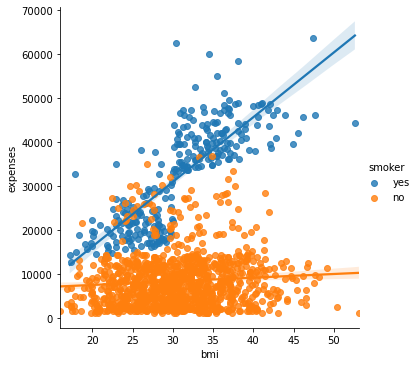

In [24]:
sns.lmplot(x="bmi", y="expenses", hue="smoker", data=df_eda)

# EDA categorical data 


<AxesSubplot:xlabel='sex', ylabel='expenses'>

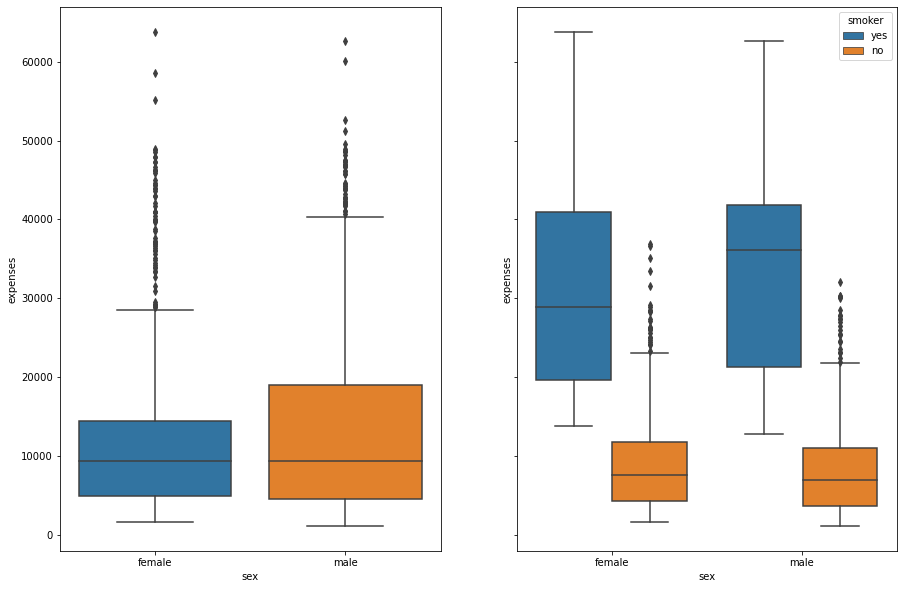

In [25]:
# EDA boxplot of sex and expenses
fig, axes = plt.subplots(1,2, figsize=(15, 10), sharey=True)
sns.boxplot(ax=axes[0], x="sex", y='expenses',data=df_eda)  

# EDA boxplot of sex and expenses with category of smoker or non-smoker 
sns.boxplot(ax=axes[1], x="sex", y='expenses',hue='smoker',data=df_eda)  

<AxesSubplot:xlabel='region', ylabel='expenses'>

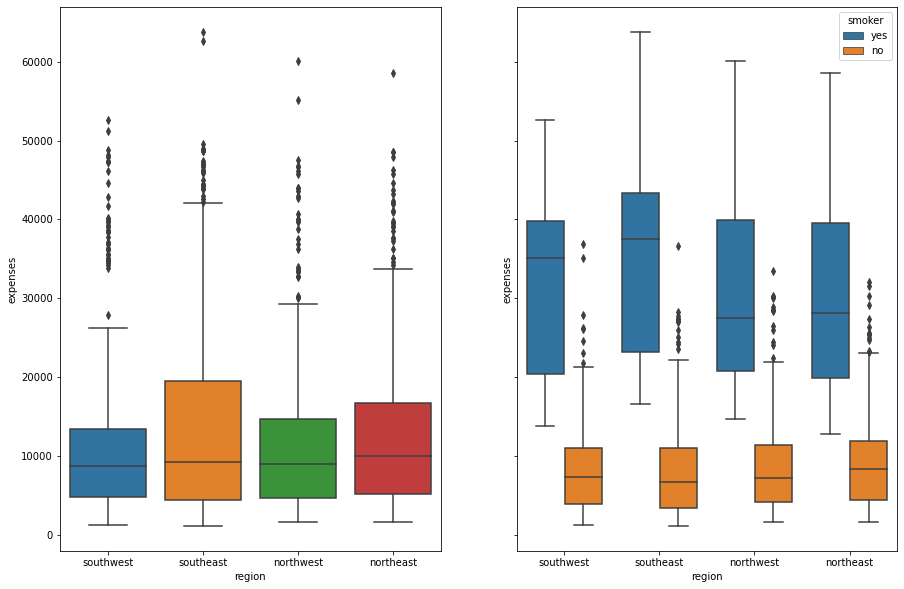

In [26]:
# EDA boxplot of region and expenses 
fig, axes = plt.subplots(1,2, figsize=(15, 10), sharey=True)
sns.boxplot(ax=axes[0], x="region", y='expenses',data=df_eda)  

# EDA boxplot of region and expenses with category of smoker or non-smoker 
sns.boxplot(ax=axes[1], x="region", y='expenses',hue='smoker',data=df_eda)    

<AxesSubplot:xlabel='No of children', ylabel='expenses'>

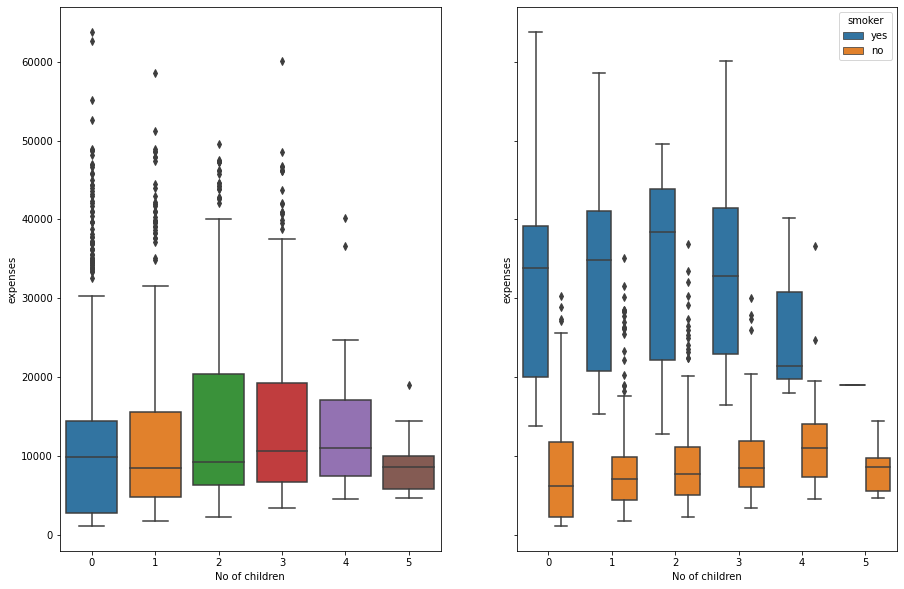

In [27]:
# EDA boxplot of number of children and expenses 
fig, axes = plt.subplots(1,2, figsize=(15, 10), sharey=True)
sns.boxplot(ax=axes[0], x="No of children", y='expenses',data=df_eda) 

# EDA boxplot of region and expenses with category of smoker or non-smoker 
sns.boxplot(ax=axes[1],x="No of children", y='expenses',hue='smoker',data=df_eda) 

<AxesSubplot:xlabel='age_groups', ylabel='expenses'>

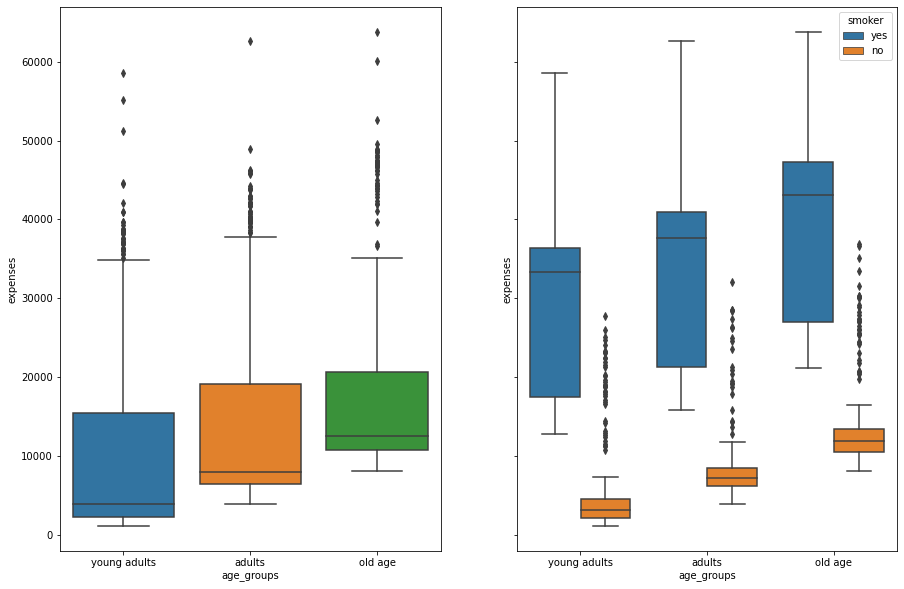

In [28]:
# EDA boxplot of age and expenses with category 
fig, axes = plt.subplots(1,2, figsize=(15, 10), sharey=True)
sns.boxplot(ax=axes[0], x='age_groups', y='expenses', data=df_eda)

# EDA boxplot of age and expenses with category of smoker or non-smoker 
sns.boxplot(ax=axes[1], x='age_groups', y='expenses',hue='smoker', data=df_eda)

# Feature Engineering 

In [29]:
from sklearn.preprocessing import OneHotEncoder
df_feat = df_eda.copy()

In [30]:
df_feat.head()

,age,sex,bmi,No of children,smoker,region,expenses,age_groups
0,19,female,27.9,0,yes,southwest,16884.92,young adults
1,18,male,33.8,1,no,southeast,1725.55,young adults
2,28,male,33.0,3,no,southeast,4449.46,young adults
3,33,male,22.7,0,no,northwest,21984.47,young adults
4,32,male,28.9,0,no,northwest,3866.86,young adults


In [31]:
#======= encode categorical data =============
ohc = OneHotEncoder(drop='first')

mask_cat = df_feat.dtypes == np.object
df_feat_encode_col = df_feat.columns[mask_cat]

In [32]:
df_feat_encode_col

Index(['sex', 'smoker', 'region'], dtype='object')

In [33]:
for col in df_feat_encode_col:
    
    new_data = ohc.fit_transform(df_feat[[col]])
    
    df_feat = df_feat.drop(col, axis=1)

    cats = ohc.categories_
    
    new_cols = ['_'.join([col,cat]) for cat in cats[0][1:]]
    
    new_df = pd.DataFrame(new_data.toarray(), columns=new_cols)
    
    df_feat = pd.concat([df_feat, new_df], axis=1)

In [34]:
df_feat.drop('age_groups', axis=1, inplace=True)

In [35]:
df_feat.head()

,age,bmi,No of children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0.0,1.0,0.0,0.0,1.0
1,18,33.8,1,1725.55,1.0,0.0,0.0,1.0,0.0
2,28,33.0,3,4449.46,1.0,0.0,0.0,1.0,0.0
3,33,22.7,0,21984.47,1.0,0.0,1.0,0.0,0.0
4,32,28.9,0,3866.86,1.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

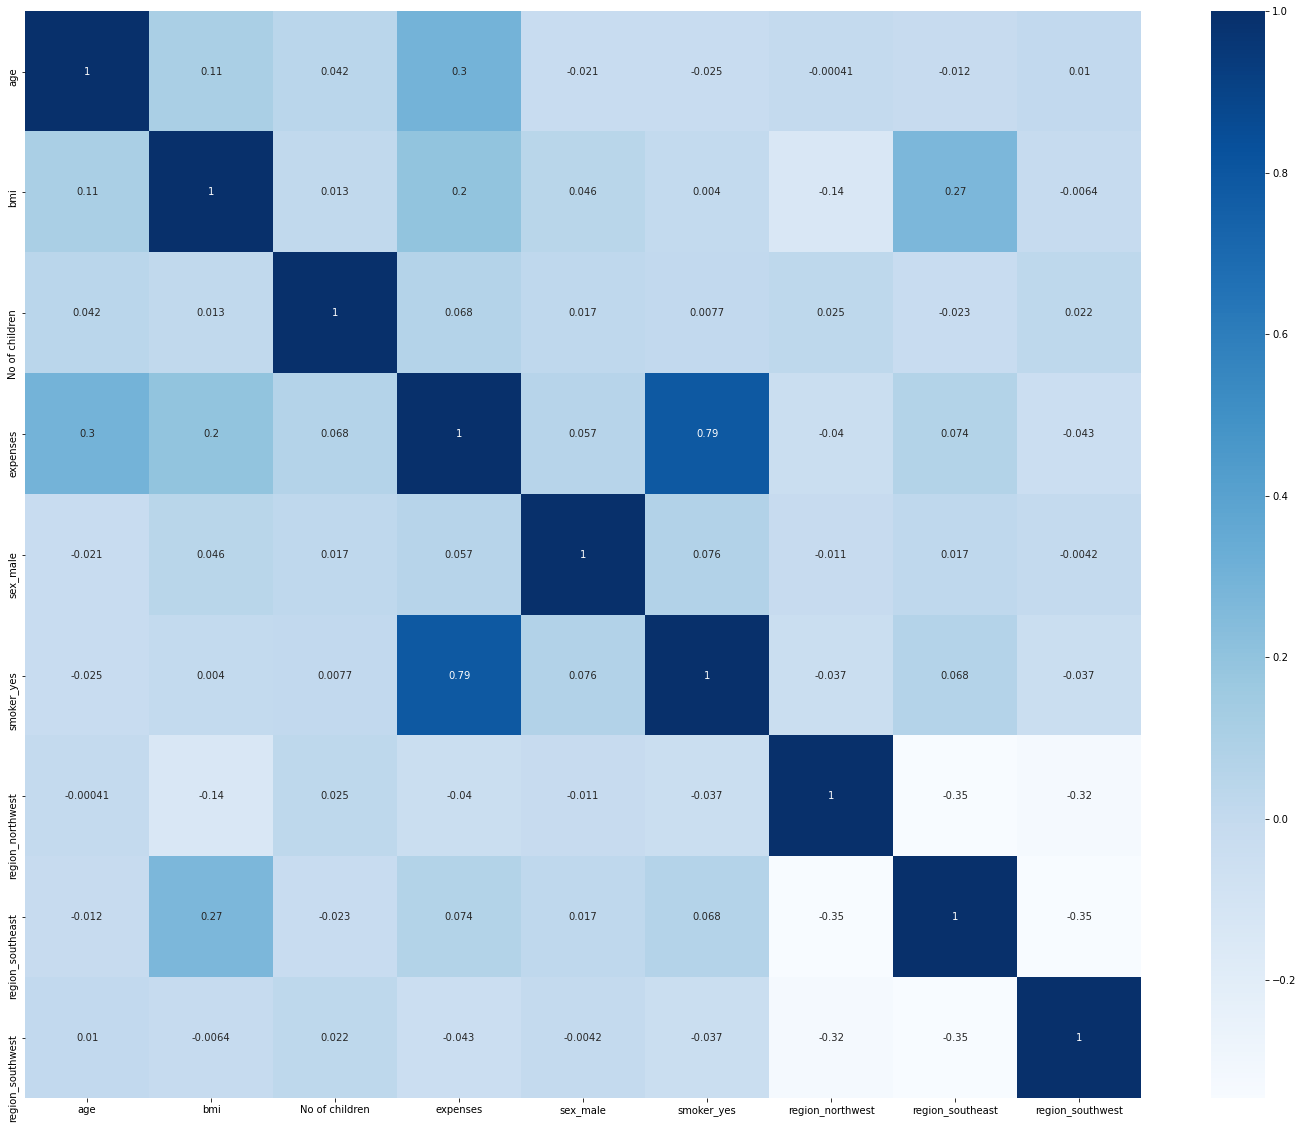

In [36]:
# Heatmap for correlation of features
plt.figure(figsize=(25,20))
sns.heatmap(df_feat.corr(),annot=True, cmap="Blues") 

# MACHINE LEARNING 

In [37]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [38]:
df_ml = df_feat.copy()

In [39]:
# Assign data 
y_col = 'expenses'
x_col = [x for x in df_ml.columns[df_ml.columns != y_col]]

In [40]:
X = df_ml[x_col]
y = df_ml[y_col]

In [41]:
#view feature data
X

,age,bmi,No of children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,0.0,1.0,0.0,0.0,1.0
1,18,33.8,1,1.0,0.0,0.0,1.0,0.0
2,28,33.0,3,1.0,0.0,0.0,1.0,0.0
3,33,22.7,0,1.0,0.0,1.0,0.0,0.0
4,32,28.9,0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,50,31.0,3,1.0,0.0,1.0,0.0,0.0
1334,18,31.9,0,0.0,0.0,0.0,0.0,0.0
1335,18,36.9,0,0.0,0.0,0.0,1.0,0.0
1336,21,25.8,0,0.0,0.0,0.0,0.0,1.0


In [42]:
#view target data
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [43]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Machine Learning Model - (Linear Regression)

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

In [45]:
# Evaluation Machine Learning 
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_R_score = r2_score(y_test, lr_y_pred)
print(f'MSE of model is: {lr_mse}')
print(f'R_score Score of model is: {lr_R_score}')

MSE of model is: 33777093.10084605
R_score Score of model is: 0.7696351080608885


[Text(0.5, 0, 'Actual Expenses'),
 Text(0, 0.5, 'Predicted Expenses'),
 (0.0, 63770.43),
 (0.0, 63770.43),
 Text(0.5, 1.0, 'Linear Regression Resutls')]

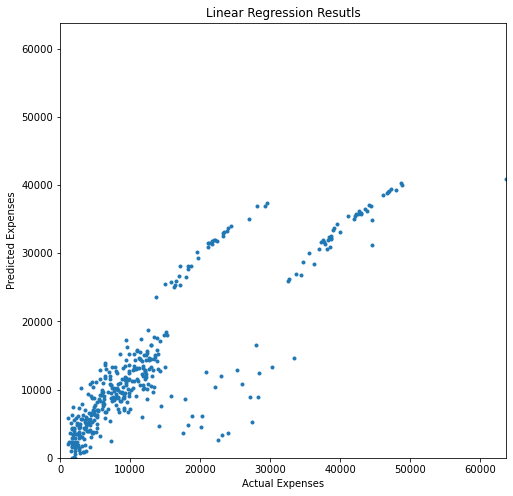

In [46]:
# Plotting of results y_test vs y_predict
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.plot(y_test, lr_y_pred, marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Expenses',
       ylabel='Predicted Expenses',
       xlim=lim,
       ylim=lim,
       title='Linear Regression Resutls')

# Machine Learning Model - (Polynomial Regression)

In [47]:
# import library
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [48]:
# buil pipeline including polynomial feature with Linear Regression
estimator = Pipeline([('polynomial_features',PolynomialFeatures()),
                 ('Linear_reg',LinearRegression())])

# create hyperparameters selection 
params = {'polynomial_features__degree':[2,3,4,5,6,7,8,9,10]}

# splitting of kfold
kf = KFold(n_splits=3, shuffle=True, random_state=7018)

# gridsearch to select best hyperparameters 
grid = GridSearchCV(estimator, params, cv=kf, n_jobs=-1)
grid.fit(X.values,y.values)

# obtain best Score and Hyperparameter selection
print(f'Best Score for model is: {grid.best_score_}')
print(f'Best Hyperparameter for model is: {grid.best_params_}')

Best Score for model is: 0.8166165283820196
Best Hyperparameter for model is: {'polynomial_features__degree': 2}


In [49]:
# Model Polynomial Feature
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train test split
from sklearn.model_selection import train_test_split
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Fit Model 
lr_poly = LinearRegression().fit(X_poly_train,y_train)

y_poly_pred = lr_poly.predict(X_poly_test)

y_poly_mse = mean_squared_error(y_test, y_poly_pred)
y_poly_R_score = r2_score(y_test, y_poly_pred)
print(f'MSE of model is: {y_poly_mse}')
print(f'R_score Score of model is: {y_poly_R_score}')

MSE of model is: 20605042.588408243
R_score Score of model is: 0.8594704880284515


In [50]:
#Coefficeint for polynomial regression
lr_poly_coed = lr_poly.coef_
print(f'Coefficeint of model is {lr_poly_coed}')

Coefficeint of model is [-5.29608382e+13 -6.84325307e+01  7.69256043e+02  7.81404290e+02
 -1.34746917e+03 -1.03660512e+04 -7.99037389e+02 -1.48360118e+02
 -1.95122834e+02  3.57153864e+00  5.90624786e-01 -4.95516097e+00
  1.37924994e+01  3.86670861e+00  1.92719496e+01  4.08787789e+01
  6.10581839e+01 -1.17434831e+01  1.33898055e+01  2.79973298e+01
  1.46904285e+03 -4.35644502e+01 -9.22755827e+01 -1.05508342e+02
  3.74584842e+00 -2.79592824e+02 -5.64438911e+02  1.08553620e+02
 -1.24955917e+02 -5.24899296e+02 -1.34746917e+03  1.19275019e+02
  2.34717521e+03  1.84145876e+03  4.52464987e+02 -1.03660512e+04
 -6.34861916e+01 -8.34166202e+02  1.42275907e+03 -7.99037389e+02
  0.00000000e+00  0.00000000e+00 -1.48360118e+02  0.00000000e+00
 -1.95122834e+02]


[Text(0.5, 0, 'Actual Expenses'),
 Text(0, 0.5, 'Predicted Expenses'),
 (0.0, 63770.43),
 (0.0, 63770.43),
 Text(0.5, 1.0, 'Polynomial Regression Resutls')]

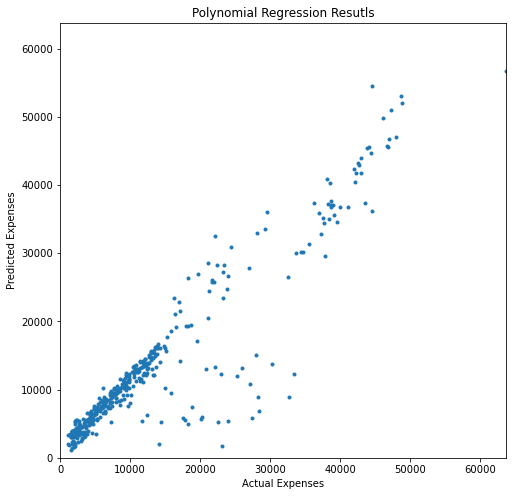

In [51]:
# Plotting of results y_test vs y_predict
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.plot(y_test, y_poly_pred, marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Expenses',
       ylabel='Predicted Expenses',
       xlim=lim,
       ylim=lim,
       title='Polynomial Regression Resutls')

# Machine Learning Model - (Ridge Regression) 

In [52]:
# import library
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_poly_train_scale = sc.fit_transform(X_poly_train)
X_poly_test_scale = sc.transform(X_poly_test)

In [53]:
# buil pipeline including polynomial feature with Ridge Regression Regression
estimator_ridge = Pipeline([('polynomial_features',PolynomialFeatures()),
                            ('scaler',StandardScaler()),
                            ('ridge_regression',Ridge(max_iter=(10000)))])

# create hyperparameters selection
params_ridge = {'polynomial_features__degree':[2,3,4,5,6,7,8,9,10],
                'ridge_regression__alpha':[0.0001,0.001,0.01,0.1,1,10,15,100,1000]}

# splitting of kfold
kf = KFold(n_splits=3, shuffle=True, random_state=7018)

# gridsearch to select best hyperparameters 
grid_ridge = GridSearchCV(estimator_ridge, params_ridge, cv=kf,n_jobs=-1)
grid_ridge.fit(X.values,y.values)

# obtain best Score and Hyperparameter selection
print(f'Best Score for model is: {grid_ridge.best_score_}')
print(f'Best Hyperparameter for model is: {grid_ridge.best_params_}')

Best Score for model is: 0.8362170113709121
Best Hyperparameter for model is: {'polynomial_features__degree': 2, 'ridge_regression__alpha': 1}


In [54]:
lr_Ridge = Ridge(alpha=1,max_iter=(1000)).fit(X_poly_train_scale,y_train)

y_ridge_pred_scale = lr_Ridge.predict(X_poly_test_scale)

Ridge_mse = mean_squared_error(y_test, y_ridge_pred_scale)
Ridge_R_score = r2_score(y_test, y_ridge_pred_scale)
print(f'MSE of model is: {Ridge_mse}')
print(f'R_score Score of model is: {Ridge_R_score}')

MSE of model is: 20437185.45984349
R_score Score of model is: 0.860615299074434


In [55]:
#Coefficeint for Ridge regression
lr_Ridge_coef = lr_Ridge.coef_
print(f'Coefficeint of model is {lr_Ridge_coef}')

Coefficeint of model is [ 0.00000000e+00 -1.52865607e+03  2.73852603e+03  9.53163133e+02
 -6.04683731e+02 -3.88672309e+03 -3.76331686e+02 -2.99989849e+01
 -5.67263388e+01  4.20568894e+03  7.42956183e+02 -2.19452367e+02
  3.33631038e+02  9.79647674e+00  4.08855347e+02  7.89859753e+02
  1.11601799e+03 -2.73455164e+03  7.68184217e+02  3.06975575e+02
  1.79183353e+04 -3.10528203e+02 -1.47223685e+03 -1.45300393e+03
 -1.63460062e+02 -3.26653998e+02 -3.47456706e+02 -3.10168823e+00
 -1.99697165e+02 -4.99445829e+02 -6.04683731e+02  1.23378082e+02
  5.99058905e+02  6.48831372e+02  1.94941644e+02 -3.88672309e+03
 -6.04062402e+01 -1.33017733e+02  3.35187613e+02 -3.76331686e+02
  0.00000000e+00  0.00000000e+00 -2.99989849e+01  0.00000000e+00
 -5.67263388e+01]


[Text(0.5, 0, 'Actual Expenses'),
 Text(0, 0.5, 'Predicted Expenses'),
 (0.0, 63770.43),
 (0.0, 63770.43),
 Text(0.5, 1.0, 'Ridge Regression Resutls')]

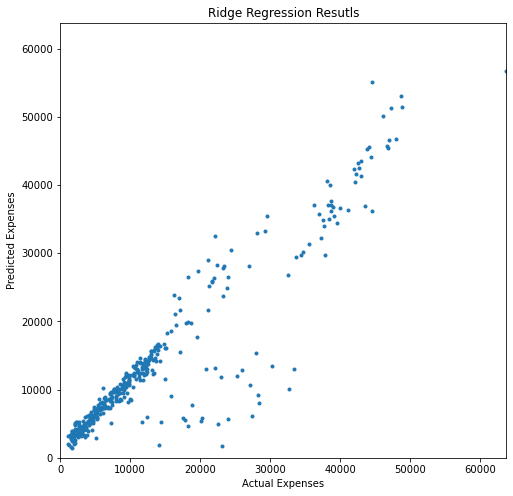

In [56]:
# Plotting of results y_test vs y_predict


fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.plot(y_test, y_ridge_pred_scale, marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Expenses',
       ylabel='Predicted Expenses',
       xlim=lim,
       ylim=lim,
       title='Ridge Regression Resutls')


#  Machine Learning Model - (Lasso Regression)

In [58]:
# import library 
from sklearn.linear_model import Lasso

In [62]:
# buil pipeline including polynomial feature with Lasso Regression Regression
estimator_Lasso = Pipeline([('polynomial_features',PolynomialFeatures()),
                            ('scaler',StandardScaler()),
                            ('predict',Lasso(max_iter=(100)))])

# create hyperparameters selection
params_Lasso = {'polynomial_features__degree':[2,3,4,5,6,7,8,9,10],
                'predict__alpha':[0.0001,0.001,0.01,0.1,1,10,15,100,1000]}

# splitting of kfold
kf = KFold(n_splits=3, shuffle=True, random_state=7018)

# gridsearch to select best hyperparameters
grid_Lasso = GridSearchCV(estimator_Lasso, params_Lasso, cv=kf, n_jobs=-1)
grid_Lasso.fit(X.values,y.values)

# obtain best Score and Hyperparameter selection
print(f'Best Score for model is: {grid_Lasso.best_score_}')
print(f'Best Hyperparameter for model is: {grid_Lasso.best_params_}')

Best Score for model is: 0.837102046371219
Best Hyperparameter for model is: {'polynomial_features__degree': 2, 'predict__alpha': 15}


D:\anacondasetup\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2595534143.458843, tolerance: 19607422.16659173
  model = cd_fast.enet_coordinate_descent(


In [65]:
lr_Lasso = Lasso(alpha=15,max_iter=(10000)).fit(X_poly_train_scale,y_train)

Lasso_pred_scale = lr_Lasso.predict(X_poly_test_scale)

Lasso_mse = mean_squared_error(y_test, Lasso_pred_scale)
Lasso_R_score = r2_score(y_test, Lasso_pred_scale)
print(f'MSE of model is: {Lasso_mse}')
print(f'R_score Score of model is: {Lasso_R_score}')

MSE of model is: 20325710.163009387
R_score Score of model is: 0.8613755774865637


In [66]:
#Coefficeint for Lasso regression
lr_Lasso_coef = lr_Lasso.coef_
print(f'Coefficeint of model is {lr_Lasso_coef}')

Coefficeint of model is [    0.            -0.          1380.65482587   360.49250906
  -350.63724087   -50.76923825  -320.19669186     0.
    -0.          3415.61471315   250.98292628    -0.
    23.13561319    -0.            -0.           376.95007316
   587.01862674 -1204.85758434   837.90198615     0.
 17716.78702932    -0.         -1062.50555665  -928.3902624
     0.          -255.72142748  -306.88716675    26.61850312
  -101.29370081  -457.14711829   -90.19286079    78.74114532
   392.72877293   475.72083672    28.52189511 -7521.9028789
   -43.52848869   -91.26352001   315.26008229  -207.16523257
     0.             0.             0.             0.
    -0.        ]


[Text(0.5, 0, 'Actual Expenses'),
 Text(0, 0.5, 'Predicted Expenses'),
 (0.0, 63770.43),
 (0.0, 63770.43),
 Text(0.5, 1.0, 'Lasso Regression Resutls')]

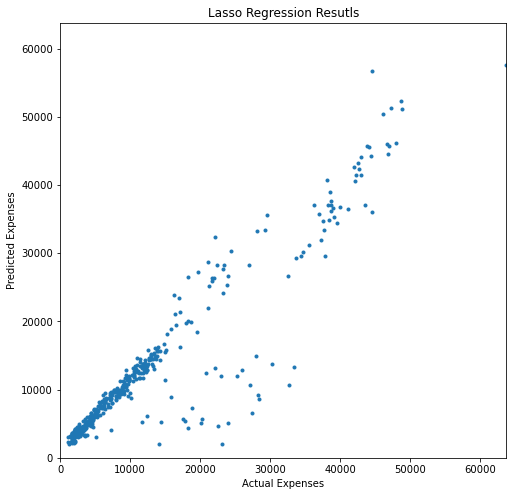

In [67]:
# Plotting of results y_test vs y_predict
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.plot(y_test, Lasso_pred_scale, marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Expenses',
       ylabel='Predicted Expenses',
       xlim=lim,
       ylim=lim,
       title='Lasso Regression Resutls')

#  Machine Learning Model - (Elastic Net Regression)

In [68]:
# import library 
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [69]:
ratios = [0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10]
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
elastic_net_cv = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=kf, n_jobs=-1).fit(X_poly_train_scale, y_train)

print('Best alpha is: %f' % elastic_net_cv.alpha_)
print('Best ratio is: %f' % elastic_net_cv.l1_ratio_)

D:\anacondasetup\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124147050.82205963, tolerance: 9780891.158959433
  model = cd_fast.enet_coordinate_descent_gram(
D:\anacondasetup\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 367658810.3862171, tolerance: 9780891.158959433
  model = cd_fast.enet_coordinate_descent_gram(
D:\anacondasetup\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102234852.21874237, tolerance: 8750514.70618483
  model = cd_fast.enet_coordinate_descent_gram(
D:\anacondasetup\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did

Best alpha is: 10.000000
Best ratio is: 1.000000


In [70]:
Elastic_net_pred_scale = elastic_net_cv.predict(X_poly_test_scale)
ElasticNetCV_mse = mean_squared_error(y_test,Elastic_net_pred_scale)
ElasticNetCV_R_score = r2_score(y_test, Elastic_net_pred_scale)
print(f'MSE of model is: {ElasticNetCV_mse}')
print(f'R_score Score of model is: {ElasticNetCV_R_score}')

MSE of model is: 20330623.390136156
R_score Score of model is: 0.8613420685332399


In [71]:
#Coefficeint for Lasso regression
lr_ElasticNet_coef = elastic_net_cv.coef_
print(f'Coefficeint of model is {lr_ElasticNet_coef}')

Coefficeint of model is [    0.           -93.63698623  1968.6144516    446.71922225
  -376.62692715   -35.21477125  -346.03107721     0.
    -0.          3457.84157218   233.88718678    -0.
   113.94540639    -0.             0.           460.47688414
   698.49973213 -1782.76023153   796.19397536     0.
 18001.54479728    -0.         -1166.03466513 -1076.62188883
    -0.          -281.20923316  -310.34065716    22.08736903
  -132.44193094  -473.88684295  -213.07841949    85.09961413
   461.78253601   544.76253479    85.89000827 -7801.22929282
   -51.66710746  -121.62542074   313.40041782  -237.34227806
     0.             0.             0.             0.
    -0.        ]


[Text(0.5, 0, 'Actual Expenses'),
 Text(0, 0.5, 'Predicted Expenses'),
 (0.0, 63770.43),
 (0.0, 63770.43),
 Text(0.5, 1.0, 'Elastic Net Regression Resutls')]

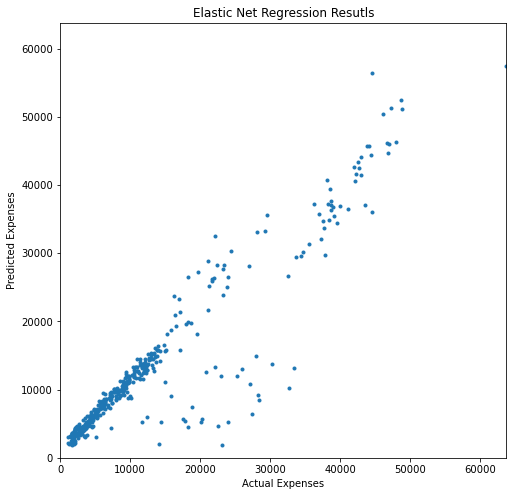

In [72]:
# Plotting of results y_test vs y_predict
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.plot(y_test, Elastic_net_pred_scale, marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Expenses',
       ylabel='Predicted Expenses',
       xlim=lim,
       ylim=lim,
       title='Elastic Net Regression Resutls')

Text(0.5, 1.0, 'Elastic Net Regression')

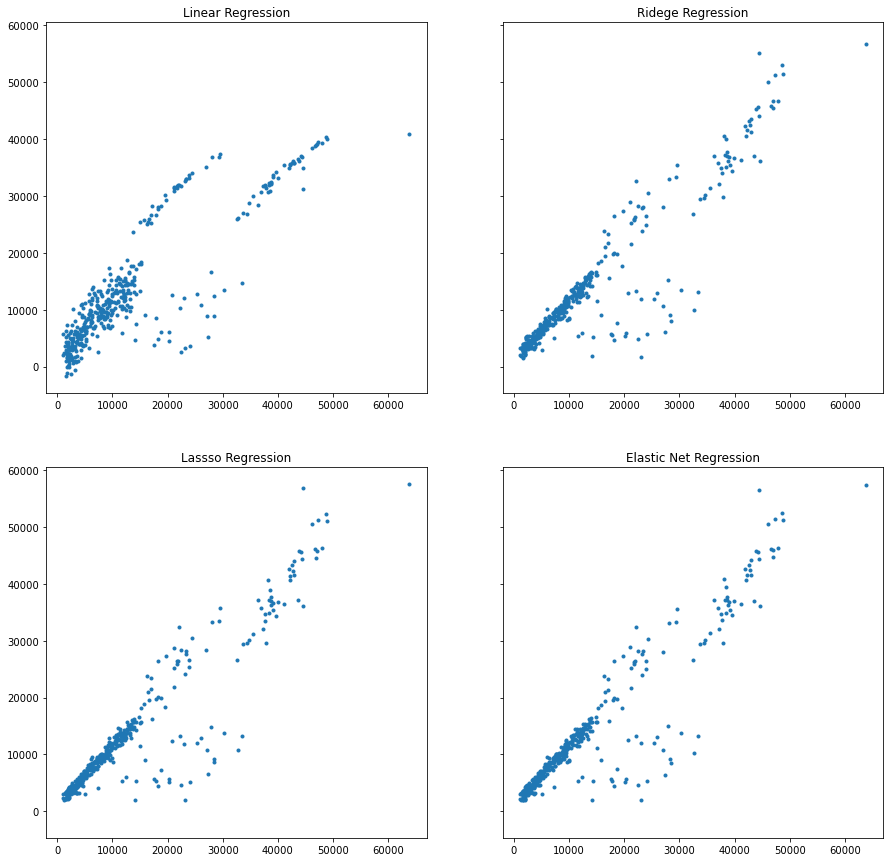

In [73]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15), sharey=True)

ax1.plot(y_test, lr_y_pred, marker='o', ls='', ms=3.0)
ax1.set_title('Linear Regression')

ax2.plot(y_test, y_ridge_pred_scale, marker='o', ls='', ms=3.0)
ax2.set_title('Ridege Regression')

ax3.plot(y_test, Lasso_pred_scale, marker='o', ls='', ms=3.0)
ax3.set_title('Lassso Regression')

ax4.plot(y_test, Elastic_net_pred_scale, marker='o', ls='', ms=3.0)
ax4.set_title('Elastic Net Regression')

In [74]:
model =['Linear', 'Ridge', 'Lasso', 'Elastic']

MSE = [lr_mse,Ridge_mse,Lasso_mse,ElasticNetCV_mse]

RMSE = np.array(MSE) ** (1/2)

R_Score = [lr_R_score,Ridge_R_score,Lasso_R_score,ElasticNetCV_R_score]

data = {'Model' : model, 'MSE': MSE, 'RMSE' : RMSE,'R_Score': R_Score}

In [75]:
df_metrics = pd.DataFrame(data).set_index('Model')

In [76]:
df_metrics

,MSE,RMSE,R_Score
Model,,,
Linear,3.377709e+07,5811.806354,0.769635
Ridge,2.043719e+07,4520.750542,0.860615
Lasso,2.032571e+07,4508.404392,0.861376
Elastic,2.033062e+07,4508.949256,0.861342


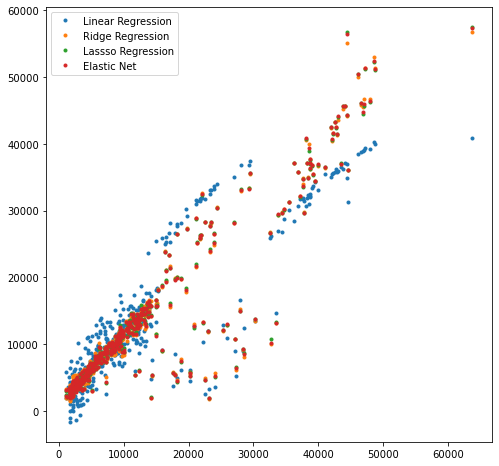

In [101]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

ax.plot(y_test, lr_y_pred, marker='o', ls='', ms=3.0)


ax.plot(y_test, y_ridge_pred_scale, marker='o', ls='', ms=3.0)


ax.plot(y_test, Lasso_pred_scale, marker='o', ls='', ms=3.0)


ax.plot(y_test, Elastic_net_pred_scale, marker='o', ls='', ms=3.0)

ax.legend( ['Linear Regression', 'Ridge Regression', 'Lassso Regression','Elastic Net'])

plt.show() 

